In [1]:
# Importing the relvant libraries/ modules that I will use throughout the following code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pytz import timezone
import datetime

In [2]:
# Read the CSV file from my own desktop containing all of Elon Musks tweets, likes, retweets etc. from 2012 to March, 2021
spreadsheet = pd.read_csv('C:/Users/Lachlan/Downloads/TweetsElonMusk.csv')

In [3]:
spreadsheet

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",NaN,NaN,NaN,NaN
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12557,1382255613665701894,1382189497694121990,2021-04-14 11:53:14 EEST,2021-04-14,11:53:14,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'eugenelee3', 'name': 'eugene...",NaN,NaN,NaN,NaN
12558,1382239892445401089,1382189497694121990,2021-04-14 10:50:45 EEST,2021-04-14,10:50:45,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'PPathole', 'name': 'Pranay P...",NaN,NaN,NaN,NaN
12559,1382239304097824768,1382189497694121990,2021-04-14 10:48:25 EEST,2021-04-14,10:48:25,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'PPathole', 'name': 'Pranay P...",NaN,NaN,NaN,NaN
12560,1382131928619495429,1382046129450258434,2021-04-14 03:41:45 EEST,2021-04-14,03:41:45,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Erdayastronaut', 'name': 'Ev...",NaN,NaN,NaN,NaN


In [4]:
# Filter out unnecessary columns
columns_of_interest = ['date', 'time', 'tweet', 'likes_count']
three_columns_of_data = spreadsheet.loc[:, columns_of_interest]

In [6]:
# Filter out data for everything other than some keywords, by applying a mask to the columns of data intended upon
pattern = 'Bitcoin|bitcoin|crypto|Crypto|Blockchain|blockchain|Cryptocurrency|cryptocurrency|Ethereum|ethereum|Coinbase|coinbase|DeFi|Doge|doge|DOGE|HODL|NFT|Coin|coin|BTC|ETH'
mask = three_columns_of_data['tweet'].str.contain(pattern, case=False, na=False)
tweets = three_columns_of_data[mask]

AttributeError: 'StringMethods' object has no attribute 'contain'

In [6]:
tweets

,date,time,tweet,likes_count
19,2021-04-10,10:29:01,Kong vs Godzilla has record for most meth ever...,165208
24,2021-04-10,09:44:23,@memescryptor !,3986
44,2021-04-09,05:57:27,@TarekWaked @TechCrunch @etherington Pretty mu...,2312
55,2021-04-08,23:45:19,@dogeofficialceo @WatchersTank @SpaceX Looking...,4081
61,2021-04-07,23:09:27,"@jgrano305 Probably J&amp;J, but BioNtech &amp...",5548
...,...,...,...,...
12530,2021-04-16,00:10:47,@sadiaslayy @DogecoinBets 😮,40139
12534,2021-04-15,07:33:18,Doge Barking at the Moon https://t.co/QFB81D7zOL,310149
12535,2021-04-15,07:28:47,@WSBChairman Doge Barking at the Moon – Miro ...,18615
12544,2021-04-15,01:32:57,@AstroJordy @dogeofficialceo @F9Block5 Insanel...,2439


In [7]:
# Convert date and time columns to datetime data type, allowing me to convert the timezone from EEST to UTC
tweets.loc[:, 'date'] = pd.to_datetime(tweets['date'], format='%Y-%m-%d')
tweets.loc[:, 'time'] = pd.to_datetime(tweets['time'], format='%H:%M:%S')

C:\Users\Lachlan\AppData\Local\Temp\ipykernel_24732\1032824710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets.loc[:, 'date'] = pd.to_datetime(tweets['date'], format='%Y-%m-%d')
C:\Users\Lachlan\AppData\Local\Temp\ipykernel_24732\1032824710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets.loc[:, 'time'] = pd.to_datetime(tweets['time'], format='%H:%M:%S')


In [8]:
tweets['datetime'] = pd.to_datetime(tweets['date'].dt.strftime('%Y-%m-%d') + ' ' + tweets['time'].dt.strftime('%H:%M:%S'))
tweets['datetime'] = tweets['datetime'] - datetime.timedelta(hours=2)

C:\Users\Lachlan\AppData\Local\Temp\ipykernel_24732\2241887585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['datetime'] = pd.to_datetime(tweets['date'].dt.strftime('%Y-%m-%d') + ' ' + tweets['time'].dt.strftime('%H:%M:%S'))
C:\Users\Lachlan\AppData\Local\Temp\ipykernel_24732\2241887585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['datetime'] = tweets['datetime'] - datetime.timedelta(hours=2)


In [9]:
# Set the datetime column as the index of the DataFrame, so it can be used to identify and retrieve specific rows of data
tweets.set_index('datetime', inplace=True)

In [10]:
# Localize datetime objects to EEST timezone and convert to UTC timezone, the UTC timezone was not working, so I used the GMT timezone instead, as this is the same as UTC
eest_timezone = timezone('GMT')
tweets = tweets.tz_localize(eest_timezone).tz_convert('GMT')

In [11]:
# Filter out tweets that were made before 2019, doing this so the data is not so large, and as crypto/ Elon Musk began getting traction around this time
filter_date = tweets.index > "2019-01-01"
sorted_tweets = tweets.loc[filter_date].sort_values("datetime")

In [12]:
# Create new column with year and month only
sorted_tweets['year_month'] = sorted_tweets.index.strftime('%Y-%m')

In [13]:
# Displaying the adjusted Dataframe
sorted_tweets


,date,time,tweet,likes_count,year_month
datetime,,,,,
2019-01-03 23:04:15+00:00,2019-01-04,1900-01-01 01:04:15,There are no coincidences https://t.co/9AEbbu...,627459,2019-01
2019-01-09 20:19:14+00:00,2019-01-09,1900-01-01 22:19:14,The new Roadster will actually do something li...,146226,2019-01
2019-02-04 04:34:45+00:00,2019-02-04,1900-01-01 06:34:45,@dguisinger @Erdayastronaut @DanielDavisA Engi...,2276,2019-02
2019-02-11 02:29:23+00:00,2019-02-11,1900-01-01 04:29:23,@alexmd2 @SpaceX Definitely! It’s amazing that...,1504,2019-02
2019-02-11 02:50:09+00:00,2019-02-11,1900-01-01 04:50:09,@_cgp @SpaceX Propellant was not deep cryo. CH...,1080,2019-02
...,...,...,...,...,...
2021-04-14 23:19:48+00:00,2021-04-15,1900-01-01 01:19:48,@dogeofficialceo @F9Block5 🤣🤣,1648,2021-04
2021-04-14 23:32:57+00:00,2021-04-15,1900-01-01 01:32:57,@AstroJordy @dogeofficialceo @F9Block5 Insanel...,2439,2021-04
2021-04-15 05:28:47+00:00,2021-04-15,1900-01-01 07:28:47,@WSBChairman Doge Barking at the Moon – Miro ...,18615,2021-04


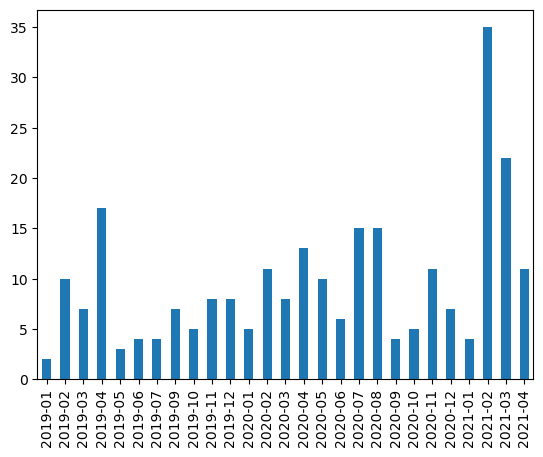

In [14]:
# Group the tweets by year_month column
grouped_tweets = sorted_tweets.groupby('year_month')

# Sort the groups by year_month column in ascending order (left to right, from 2019 to 2021)
sorted_groups = grouped_tweets.apply(lambda x: x.sort_values('year_month'))

# Plot the bar chart using the sorted group order
tweet_counts = sorted_groups['year_month'].value_counts().sort_index().plot.bar()

In [15]:
sorted_groups

date                time  \
year_month datetime                                                   
2019-01    2019-01-03 23:04:15+00:00 2019-01-04 1900-01-01 01:04:15   
           2019-01-09 20:19:14+00:00 2019-01-09 1900-01-01 22:19:14   
2019-02    2019-02-04 04:34:45+00:00 2019-02-04 1900-01-01 06:34:45   
           2019-02-11 02:29:23+00:00 2019-02-11 1900-01-01 04:29:23   
           2019-02-11 02:50:09+00:00 2019-02-11 1900-01-01 04:50:09   
...                                         ...                 ...   
2021-04    2021-04-14 23:19:48+00:00 2021-04-15 1900-01-01 01:19:48   
           2021-04-14 23:32:57+00:00 2021-04-15 1900-01-01 01:32:57   
           2021-04-15 05:28:47+00:00 2021-04-15 1900-01-01 07:28:47   
           2021-04-15 05:33:18+00:00 2021-04-15 1900-01-01 07:33:18   
           2021-04-15 22:10:47+00:00 2021-04-16 1900-01-01 00:10:47   

                                                                                  tweet  \
year_month datetime                                                                       
2019-01    2019-01-03 23:04:15+00:00  There are no coincidences  https://t.co/9AEbbu...   
           2019-01-09 20:19:14+00:00  The new Roadster will actually do something li...   
2019-02    2019-02-04 04:34:45+00:00  @dguisinger @Erdayastronaut @DanielDavisA Engi...   
           2019-02-11 02:29:23+00:00  @alexmd2 @SpaceX Definitely! It’s amazing that...   
           2019-02-11 02:50:09+00:00  @_cgp @SpaceX Propellant was not deep cryo. CH...   
...                                                                                 ...   
2021-04    2021-04-14 23:19:48+00:00                      @dogeofficialceo @F9Block5 🤣🤣   
           2021-04-14 23:32:57+00:00  @AstroJordy @dogeofficialceo @F9Block5 Insanel...   
           2021-04-15 05:28:47+00:00  @WSBChairman Doge Barking at the Moon – Miro  ...   
           2021-04-15 05:33:18+00:00  Doge Barking at the Moon  https://t.co/QFB81D7zOL   
           2021-04-15 22:10:47+00:00                        @sadiaslayy @DogecoinBets 😮   

                                      likes_count year_month  
year_month datetime                                           
2019-01    2019-01-03 23:04:15+00:00       627459    2019-01  
           2019-01-09 20:19:14+00:00       146226    2019-01  
2019-02    2019-02-04 04:34:45+00:00         2276    2019-02  
           2019-02-11 02:29:23+00:00         1504    2019-02  
           2019-02-11 02:50:09+00:00         1080    2019-02  
...                                           ...        ...  
2021-04    2021-04-14 23:19:48+00:00         1648    2021-04  
           2021-04-14 23:32:57+00:00         2439    2021-04  
           2021-04-15 05:28:47+00:00        18615    2021-04  
           2021-04-15 05:33:18+00:00       310149    2021-04  
           2021-04-15 22:10:47+00:00        40139    2021-04  

[257 rows x 5 columns]

In [16]:
bitcoin = pd.read_csv('C:/Users/Lachlan/Desktop/bitcoin_price.csv')

In [17]:
bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [18]:
# getting rid of NaN values
bitcoin['Weighted_Price'] = pd.to_numeric(bitcoin['Weighted_Price'], errors='coerce')

In [19]:
#Filtering out NaN values
columns_of_interest = ['Timestamp', 'Weighted_Price']
df = bitcoin[columns_of_interest].dropna()

In [20]:
# Converting Timestamp to yyyy/mm/dd hh:mm
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

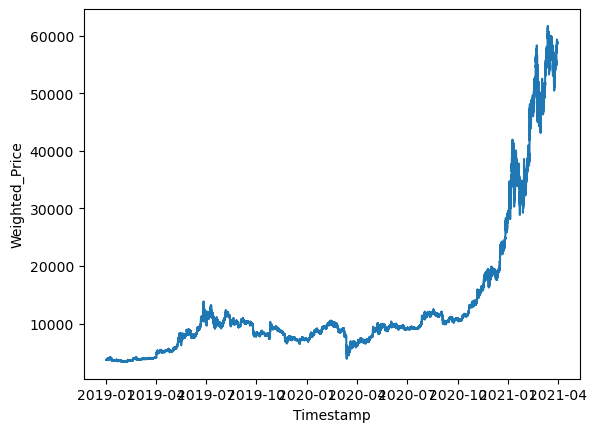

In [21]:
# Filtering out data from before 2019
start_date = pd.to_datetime('2019-01-01')
df = df[(df['Timestamp'] >= start_date)]
bitcoin_graph = sns.lineplot(x="Timestamp", y="Weighted_Price", data=df)

plt.show()

In [22]:
bitcoin.tail(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857367,1617148260,58677.05,58699.90,58660.00,58699.90,2.672676,156832.692130,58680.021260
4857368,1617148320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4857369,1617148380,58718.68,58731.23,58698.34,58698.50,0.207983,12209.055282,58702.294657
4857370,1617148440,58736.19,58762.43,58736.19,58739.95,0.041559,2441.376572,58745.145351
4857371,1617148500,58742.18,58742.18,58714.31,58714.31,2.519999,148004.448110,58731.946927
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


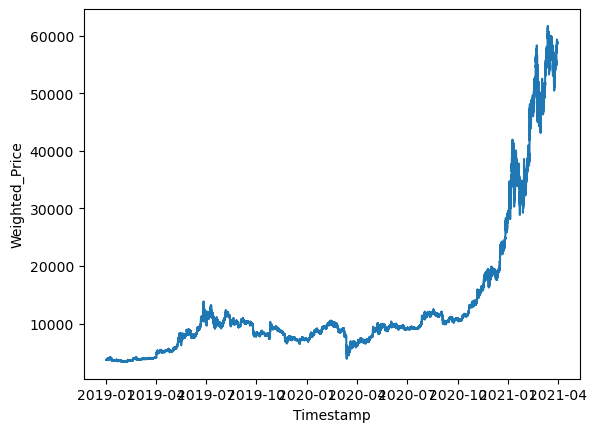

In [23]:
# Filtering out data from before 2019
start_date = pd.to_datetime('2019-01-01')
df = df[(df['Timestamp'] >= start_date)]
bitcoin_graph = sns.lineplot(x="Timestamp", y="Weighted_Price", data=df)

plt.show()

In [24]:
df

,Timestamp,Weighted_Price
3676576,2019-01-01 00:00:00,3696.974936
3676577,2019-01-01 00:01:00,3692.600865
3676578,2019-01-01 00:02:00,3687.884698
3676579,2019-01-01 00:03:00,3691.813285
3676580,2019-01-01 00:04:00,3691.614849
...,...,...
4857372,2021-03-30 23:56:00,58692.753339
4857373,2021-03-30 23:57:00,58693.226508
4857374,2021-03-30 23:58:00,58696.198496
4857375,2021-03-30 23:59:00,58761.866202


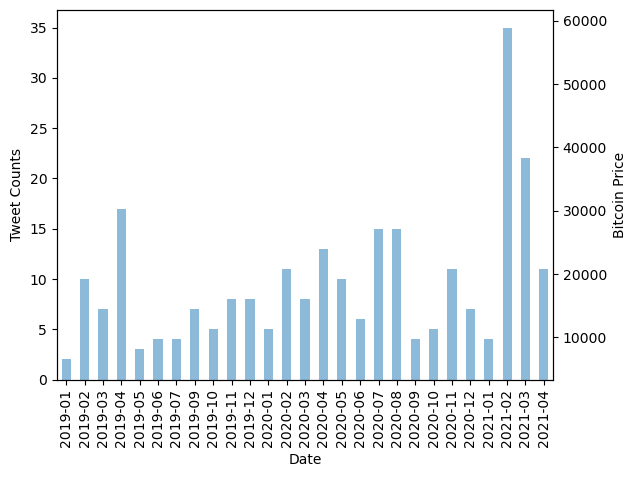

In [25]:
# Group the tweets by year_month column
grouped_tweets = sorted_tweets.groupby('year_month')

# Sort the groups by year_month column in ascending order (left to right, from 2019 to 2021)
sorted_groups = grouped_tweets.apply(lambda x: x.sort_values('year_month'))

# Filtering out data from before 2019
start_date = pd.to_datetime('2019-01-01')
df = df[(df['Timestamp'] >= start_date)]

# Create a figure with one subplot
fig, ax = plt.subplots()

# Plot the bar chart on the first y-axis
tweet_counts = sorted_groups['year_month'].value_counts().sort_index().plot.bar(ax=ax, color='tab:blue', alpha=0.5)
ax.set_ylabel('Tweet Counts')

# Create a secondary y-axis for the line graph
ax2 = ax.twinx()

# Plot the bitcoin graph on the second y-axis
bitcoin_graph = sns.lineplot(x="Timestamp", y="Weighted_Price", data=df, ax=ax2)
ax2.set_ylabel('Bitcoin Price')

# Add a common x-axis label
ax.set_xlabel('Date')

ax2.set_ylim([df['Weighted_Price'].min(), df['Weighted_Price'].max()])

# Show the plot
plt.show()



In [26]:
#list of most likes
most_liked_list = tweets.sort_values(by='likes_count', ascending=False).head(10)
most_liked_list

,date,time,tweet,likes_count
datetime,,,,
2021-03-24 07:02:40+00:00,2021-03-24,1900-01-01 09:02:40,You can now buy a Tesla with Bitcoin,902515
2021-02-07 22:25:14+00:00,2021-02-08,1900-01-01 00:25:14,🎶 Who let the Doge out 🎶,791454
2021-02-04 08:27:10+00:00,2021-02-04,1900-01-01 10:27:10,"No highs, no lows, only Doge",777805
2019-01-03 23:04:15+00:00,2019-01-04,1900-01-01 01:04:15,There are no coincidences https://t.co/9AEbbu...,627459
2021-02-04 08:15:26+00:00,2021-02-04,1900-01-01 10:15:26,Dogecoin is the people’s crypto,555730
2021-02-10 15:08:11+00:00,2021-02-10,1900-01-01 17:08:11,"Bought some Dogecoin for lil X, so he can be a...",551419
2021-04-01 11:25:23+00:00,2021-04-01,1900-01-01 13:25:23,SpaceX is going to put a literal Dogecoin on t...,535373
2020-11-13 05:47:11+00:00,2020-11-13,1900-01-01 07:47:11,Something extremely bogus is going on. Was tes...,422440
2021-03-06 04:40:30+00:00,2021-03-06,1900-01-01 06:40:30,Doge spelled backwards is Egod,409756


In [27]:
# Extract the row with the highest like count
max_likes = sorted_tweets.loc[sorted_tweets['likes_count'].idxmax()]

# Print the row
print(max_likes)

date                            2021-03-24 00:00:00
time                            1900-01-01 09:02:40
tweet          You can now buy a Tesla with Bitcoin
likes_count                                  902515
year_month                                  2021-03
Name: 2021-03-24 07:02:40+00:00, dtype: object


In [28]:
# Filter the dataframe to only include rows with a timestamp of 2021-03-24
filtered_df = df[(df['Timestamp'].dt.date == pd.to_datetime('2021-03-24').date())]

In [29]:
filtered_df

,Timestamp,Weighted_Price
4847296,2021-03-24 00:00:00,54259.782377
4847297,2021-03-24 00:01:00,54294.939725
4847298,2021-03-24 00:02:00,54433.060689
4847299,2021-03-24 00:03:00,54581.198775
4847300,2021-03-24 00:04:00,54606.676725
...,...,...
4848731,2021-03-24 23:55:00,52531.496042
4848732,2021-03-24 23:56:00,52416.052919
4848733,2021-03-24 23:57:00,52452.967686
4848734,2021-03-24 23:58:00,52494.715872


In [30]:
tweet_begin = df[df['Timestamp'] >= pd.to_datetime('2021-03-24 07:02:00')]

In [31]:
tweet_begin

,Timestamp,Weighted_Price
4847718,2021-03-24 07:02:00,54755.180568
4847719,2021-03-24 07:03:00,54976.279910
4847720,2021-03-24 07:04:00,55376.544990
4847721,2021-03-24 07:05:00,55485.277059
4847722,2021-03-24 07:06:00,55448.371830
...,...,...
4857372,2021-03-30 23:56:00,58692.753339
4857373,2021-03-30 23:57:00,58693.226508
4857374,2021-03-30 23:58:00,58696.198496
4857375,2021-03-30 23:59:00,58761.866202


In [32]:
# percentage increase formula (x2 -x1) / x1 (x1 = initial price, x2= final pricw)
initial_price = tweet_begin.iloc[0][1]
print(initial_price)
# 1 min
one_min_price = tweet_begin.iloc[1][1]
one_min_change = ((one_min_price - initial_price) / initial_price)*100
print(one_min_change)

# 5 min
five_min_price = tweet_begin.iloc[5][1]
five_min_change = ((five_min_price - initial_price) / initial_price)*100
print(five_min_change)
# 30 
thirty_min_price = tweet_begin.iloc[30][1]
thirty_min_change = ((thirty_min_price - initial_price) / initial_price)*100
print(thirty_min_change)
# 1 hour
sixty_min_price = tweet_begin.iloc[60][1]
sixty_min_change = ((sixty_min_price - initial_price) / initial_price)*100
print(sixty_min_change)
# 2 hour
onetwenty_min_price = tweet_begin.iloc[120][1]
onetwenty_min_change = ((onetwenty_min_price - initial_price) / initial_price)*100
print(onetwenty_min_change)

# 6 hour
threesixty_min_price = tweet_begin.iloc[360][1]
threesixty_min_change = ((threesixty_min_price - initial_price) / initial_price)*100
print(threesixty_min_change)

#12 hour 

seventwenty_min_price = tweet_begin.iloc[720][1]
seventwenty_min_change = ((seventwenty_min_price - initial_price) / initial_price)*100
print(seventwenty_min_change)

54755.180568
0.4037962065076429
1.1696708098781956
0.6171783902352653
1.793259793528729
3.187693536746477
3.8517014995153525
1.110014788911496


In [33]:
date_filter = (df['Timestamp'].dt.date == pd.to_datetime('2021-02-28').date()) | (df['Timestamp'].dt.date == pd.to_datetime('2021-03-01').date())
tweet_begin = df[date_filter]


In [34]:
second_tweet_from_first = tweet_begin[tweet_begin['Timestamp'] >= pd.to_datetime('2021-02-28 22:55:00')]

In [35]:
second_tweet_from_first

,Timestamp,Weighted_Price
4814111,2021-02-28 22:55:00,45239.150496
4814112,2021-02-28 22:56:00,45244.116472
4814113,2021-02-28 22:57:00,45257.260547
4814114,2021-02-28 22:58:00,45256.608707
4814115,2021-02-28 22:59:00,45239.368710
...,...,...
4815611,2021-03-01 23:55:00,49597.541188
4815612,2021-03-01 23:56:00,49683.113096
4815613,2021-03-01 23:57:00,49696.972878
4815614,2021-03-01 23:58:00,49634.081294


In [36]:
# percentage increase formula (x2 -x1) / x1 (x1 = initial price, x2= final pricw)
initial_price = second_tweet_from_first.iloc[0][1]
print(initial_price)
# 1 min
one_min_price = second_tweet_from_first.iloc[1][1]
one_min_change = ((one_min_price - initial_price) / initial_price)*100
print(one_min_change)

# 5 min
five_min_price = second_tweet_from_first.iloc[5][1]
five_min_change = ((five_min_price - initial_price) / initial_price)*100
print(five_min_change)
# 30 
thirty_min_price = second_tweet_from_first.iloc[30][1]
thirty_min_change = ((thirty_min_price - initial_price) / initial_price)*100
print(thirty_min_change)
# 1 hour
sixty_min_price = second_tweet_from_first.iloc[60][1]
sixty_min_change = (((sixty_min_price - initial_price) / initial_price)*100)
print(sixty_min_change)
# 2 hour
onetwenty_min_price = second_tweet_from_first.iloc[120][1]
onetwenty_min_change = ((onetwenty_min_price - initial_price) / initial_price)*100
print(onetwenty_min_change)

# 6 hour
threesixty_min_price = second_tweet_from_first.iloc[360][1]
threesixty_min_change = ((threesixty_min_price - initial_price) / initial_price)*100
print(threesixty_min_change)

#12 hour 

seventwenty_min_price = second_tweet_from_first.iloc[720][1]
seventwenty_min_change = ((seventwenty_min_price - initial_price) / initial_price)*100
print(seventwenty_min_change)

45239.150496
0.010977164569963768
0.0945322591850549
1.1395477641552565
-0.48286840182667856
2.6992768997905245
2.811074209080127
5.475864548382782


In [37]:
date_filter = (df['Timestamp'].dt.date == pd.to_datetime('2021-02-04').date()) | (df['Timestamp'].dt.date == pd.to_datetime('2021-02-05').date())
tweet_begin = df[date_filter]

third_tweet_from_first = tweet_begin[tweet_begin['Timestamp'] >= pd.to_datetime('2021-02-04 08:27:00')]

# percentage increase formula (x2 -x1) / x1 (x1 = initial price, x2= final pricw)
initial_price = third_tweet_from_first.iloc[0][1]
print(initial_price)
# 1 min
one_min_price = third_tweet_from_first.iloc[1][1]
one_min_change = ((one_min_price - initial_price) / initial_price)*100
print(one_min_change)

# 5 min
five_min_price = third_tweet_from_first.iloc[5][1]
five_min_change = ((five_min_price - initial_price) / initial_price)*100
print(five_min_change)
# 30 
thirty_min_price = third_tweet_from_first.iloc[30][1]
thirty_min_change = ((thirty_min_price - initial_price) / initial_price)*100
print(thirty_min_change)
# 1 hour
sixty_min_price = third_tweet_from_first.iloc[60][1]
sixty_min_change = (((sixty_min_price - initial_price) / initial_price)*100)
print(sixty_min_change)
# 2 hour
onetwenty_min_price = third_tweet_from_first.iloc[120][1]
onetwenty_min_change = ((onetwenty_min_price - initial_price) / initial_price)*100
print(onetwenty_min_change)

# 6 hour
threesixty_min_price = third_tweet_from_first.iloc[360][1]
threesixty_min_change = ((threesixty_min_price - initial_price) / initial_price)*100
print(threesixty_min_change)

#12 hour 

seventwenty_min_price = third_tweet_from_first.iloc[720][1]
seventwenty_min_change = ((seventwenty_min_price - initial_price) / initial_price)*100
print(seventwenty_min_change)

38651.952036
0.10669136182717585
-0.31030674954862014
-2.35943250977495
-3.676557804057188
-3.02578599112076
-2.827501971911027
-2.743487858031976


In [38]:
date_filter = (df['Timestamp'].dt.date == pd.to_datetime('2019-01-03').date()) | (df['Timestamp'].dt.date == pd.to_datetime('2019-01-04').date())
tweet_begin = df[date_filter]

fourth_tweet_from_first = tweet_begin[tweet_begin['Timestamp'] >= pd.to_datetime('2019-01-03 23:04:00')]

# percentage increase formula (x2 -x1) / x1 (x1 = initial price, x2= final pricw)
initial_price = fourth_tweet_from_first.iloc[0][1]
print(initial_price)
# 1 min
one_min_price = fourth_tweet_from_first.iloc[1][1]
one_min_change = ((one_min_price - initial_price) / initial_price)*100
print(one_min_change)

# 5 min
five_min_price = fourth_tweet_from_first.iloc[5][1]
five_min_change = ((five_min_price - initial_price) / initial_price)*100
print(five_min_change)
# 30 
thirty_min_price = fourth_tweet_from_first.iloc[30][1]
thirty_min_change = ((thirty_min_price - initial_price) / initial_price)*100
print(thirty_min_change)
# 1 hour
sixty_min_price = fourth_tweet_from_first.iloc[60][1]
sixty_min_change = (((sixty_min_price - initial_price) / initial_price)*100)
print(sixty_min_change)
# 2 hour
onetwenty_min_price = fourth_tweet_from_first.iloc[120][1]
onetwenty_min_change = ((onetwenty_min_price - initial_price) / initial_price)*100
print(onetwenty_min_change)

# 6 hour
threesixty_min_price = fourth_tweet_from_first.iloc[360][1]
threesixty_min_change = ((threesixty_min_price - initial_price) / initial_price)*100
print(threesixty_min_change)

#12 hour 

seventwenty_min_price = fourth_tweet_from_first.iloc[720][1]
seventwenty_min_change = ((seventwenty_min_price - initial_price) / initial_price)*100
print(seventwenty_min_change)

3789.3821386
0.0007352491509390485
-0.000818006705747876
-0.21381160051050235
-0.7682417749178378
-0.12067705585611678
0.14561374910683253
-0.0021298590917501396


In [39]:
date_filter = (df['Timestamp'].dt.date == pd.to_datetime('2021-02-04').date()) | (df['Timestamp'].dt.date == pd.to_datetime('2021-02-05').date())
tweet_begin = df[date_filter]

fifth_tweet_from_first = tweet_begin[tweet_begin['Timestamp'] >= pd.to_datetime('2021-02-04 08:15:00')]

# percentage increase formula (x2 -x1) / x1 (x1 = initial price, x2= final pricw)
initial_price = fifth_tweet_from_first.iloc[0][1]
print(initial_price)
# 1 min
one_min_price = fifth_tweet_from_first.iloc[1][1]
one_min_change = ((one_min_price - initial_price) / initial_price)*100
print(one_min_change)

# 5 min
five_min_price = fifth_tweet_from_first.iloc[5][1]
five_min_change = ((five_min_price - initial_price) / initial_price)*100
print(five_min_change)
# 30 
thirty_min_price = fifth_tweet_from_first.iloc[30][1]
thirty_min_change = ((thirty_min_price - initial_price) / initial_price)*100
print(thirty_min_change)
# 1 hour
sixty_min_price = fifth_tweet_from_first.iloc[60][1]
sixty_min_change = (((sixty_min_price - initial_price) / initial_price)*100)
print(sixty_min_change)
# 2 hour
onetwenty_min_price = fifth_tweet_from_first.iloc[120][1]
onetwenty_min_change = ((onetwenty_min_price - initial_price) / initial_price)*100
print(onetwenty_min_change)

# 6 hour
threesixty_min_price = fifth_tweet_from_first.iloc[360][1]
threesixty_min_change = ((threesixty_min_price - initial_price) / initial_price)*100
print(threesixty_min_change)

#12 hour 

seventwenty_min_price = fifth_tweet_from_first.iloc[720][1]
seventwenty_min_change = ((seventwenty_min_price - initial_price) / initial_price)*100
print(seventwenty_min_change)

38462.340963
-0.08597160539918727
0.066169193977251
-0.3654305288781345
-3.318489553789357
-2.5075640193814452
-1.9803272159973975
-1.900658757882795


In [40]:
date_filter = (df['Timestamp'].dt.date == pd.to_datetime('2021-02-10').date()) | (df['Timestamp'].dt.date == pd.to_datetime('2021-02-11').date())
tweet_begin = df[date_filter]

sixth_tweet_from_first = tweet_begin[tweet_begin['Timestamp'] >= pd.to_datetime('2021-02-10 15:08:00')]

# percentage increase formula (x2 -x1) / x1 (x1 = initial price, x2= final pricw)
initial_price = sixth_tweet_from_first.iloc[0][1]
print(initial_price)
# 1 min
one_min_price = sixth_tweet_from_first.iloc[1][1]
one_min_change = ((one_min_price - initial_price) / initial_price)*100
print(one_min_change)

# 5 min
five_min_price = sixth_tweet_from_first.iloc[5][1]
five_min_change = ((five_min_price - initial_price) / initial_price)*100
print(five_min_change)
# 30 
thirty_min_price = sixth_tweet_from_first.iloc[30][1]
thirty_min_change = ((thirty_min_price - initial_price) / initial_price)*100
print(thirty_min_change)
# 1 hour
sixty_min_price = sixth_tweet_from_first.iloc[60][1]
sixty_min_change = (((sixty_min_price - initial_price) / initial_price)*100)
print(sixty_min_change)
# 2 hour
onetwenty_min_price = sixth_tweet_from_first.iloc[120][1]
onetwenty_min_change = ((onetwenty_min_price - initial_price) / initial_price)*100
print(onetwenty_min_change)

# 6 hour
threesixty_min_price = sixth_tweet_from_first.iloc[360][1]
threesixty_min_change = ((threesixty_min_price - initial_price) / initial_price)*100
print(threesixty_min_change)

#12 hour 

seventwenty_min_price = sixth_tweet_from_first.iloc[720][1]
seventwenty_min_change = ((seventwenty_min_price - initial_price) / initial_price)*100
print(seventwenty_min_change)

44875.625462
-0.3369566628726925
0.4221260518372132
-1.1690414018724615
-1.3163126461606778
-0.6016037642274535
-0.9225083410827405
0.06399198608231767


In [41]:
#Seventh most liked tweet is out of the DataFrame's range

In [42]:
date_filter = (df['Timestamp'].dt.date == pd.to_datetime('2020-11-13').date()) | (df['Timestamp'].dt.date == pd.to_datetime('2020-11-14').date())
tweet_begin = df[date_filter]

eigth_tweet_from_first = tweet_begin[tweet_begin['Timestamp'] >= pd.to_datetime('2020-11-13 05:47:00')]

# percentage increase formula (x2 -x1) / x1 (x1 = initial price, x2= final pricw)
initial_price = eigth_tweet_from_first.iloc[0][1]
print(initial_price)
# 1 min
one_min_price = eigth_tweet_from_first.iloc[1][1]
one_min_change = ((one_min_price - initial_price) / initial_price)*100
print(one_min_change)

# 5 min
five_min_price = eigth_tweet_from_first.iloc[5][1]
five_min_change = ((five_min_price - initial_price) / initial_price)*100
print(five_min_change)
# 30 
thirty_min_price = eigth_tweet_from_first.iloc[30][1]
thirty_min_change = ((thirty_min_price - initial_price) / initial_price)*100
print(thirty_min_change)
# 1 hour
sixty_min_price = eigth_tweet_from_first.iloc[60][1]
sixty_min_change = (((sixty_min_price - initial_price) / initial_price)*100)
print(sixty_min_change)
# 2 hour
onetwenty_min_price = eigth_tweet_from_first.iloc[120][1]
onetwenty_min_change = ((onetwenty_min_price - initial_price) / initial_price)*100
print(onetwenty_min_change)

# 6 hour
threesixty_min_price = eigth_tweet_from_first.iloc[360][1]
threesixty_min_change = ((threesixty_min_price - initial_price) / initial_price)*100
print(threesixty_min_change)

#12 hour 

seventwenty_min_price = eigth_tweet_from_first.iloc[720][1]
seventwenty_min_change = ((seventwenty_min_price - initial_price) / initial_price)*100
print(seventwenty_min_change)

16243.631802
-0.10407548143216759
0.11861035903084106
0.3599603999445556
0.5403746469382082
0.17091486890623495
-0.21871385311519445
0.05918946647643703


In [43]:
date_filter = (df['Timestamp'].dt.date == pd.to_datetime('2021-03-06').date()) | (df['Timestamp'].dt.date == pd.to_datetime('2021-03-07').date())
tweet_begin = df[date_filter]

ninth_tweet_from_first = tweet_begin[tweet_begin['Timestamp'] >= pd.to_datetime('2021-03-06 04:40:00')]

# percentage increase formula (x2 -x1) / x1 (x1 = initial price, x2= final pricw)
initial_price = ninth_tweet_from_first.iloc[0][1]
print(initial_price)
# 1 min
one_min_price = ninth_tweet_from_first.iloc[1][1]
one_min_change = ((one_min_price - initial_price) / initial_price)*100
print(one_min_change)

# 5 min
five_min_price = ninth_tweet_from_first.iloc[5][1]
five_min_change = ((five_min_price - initial_price) / initial_price)*100
print(five_min_change)
# 30 
thirty_min_price = ninth_tweet_from_first.iloc[30][1]
thirty_min_change = ((thirty_min_price - initial_price) / initial_price)*100
print(thirty_min_change)
# 1 hour
sixty_min_price = ninth_tweet_from_first.iloc[60][1]
sixty_min_change = (((sixty_min_price - initial_price) / initial_price)*100)
print(sixty_min_change)
# 2 hour
onetwenty_min_price = ninth_tweet_from_first.iloc[120][1]
onetwenty_min_change = ((onetwenty_min_price - initial_price) / initial_price)*100
print(onetwenty_min_change)

# 6 hour
threesixty_min_price = ninth_tweet_from_first.iloc[360][1]
threesixty_min_change = ((threesixty_min_price - initial_price) / initial_price)*100
print(threesixty_min_change)

#12 hour 

seventwenty_min_price = ninth_tweet_from_first.iloc[720][1]
seventwenty_min_change = ((seventwenty_min_price - initial_price) / initial_price)*100
print(seventwenty_min_change)

48331.836743
-0.07435418436731185
-0.07625670465615085
-0.23175808234977313
1.0081924810576846
1.0197355412348958
-0.07361713189009655
-1.4995513616704534


In [44]:
#Tenth most liked tweet is out of DataFrame's range

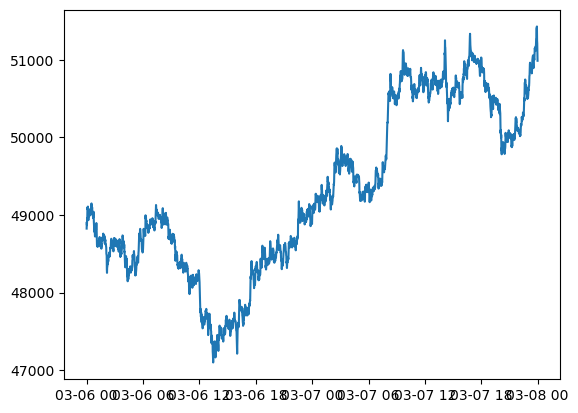

In [45]:
plt.plot(tweet_begin['Timestamp'], tweet_begin['Weighted_Price'])
plt.show()

In [46]:
filtered_df = df[(df['Timestamp'].dt.date == pd.to_datetime('2021-02-28').date())]

In [47]:
filtered_df

,Timestamp,Weighted_Price
4812736,2021-02-28 00:00:00,45971.642689
4812737,2021-02-28 00:01:00,45761.146371
4812738,2021-02-28 00:02:00,45856.122476
4812739,2021-02-28 00:03:00,45706.176656
4812740,2021-02-28 00:04:00,45732.009440
...,...,...
4814171,2021-02-28 23:55:00,45020.704933
4814172,2021-02-28 23:56:00,45090.850485
4814173,2021-02-28 23:57:00,45098.902211
4814174,2021-02-28 23:58:00,45140.532690


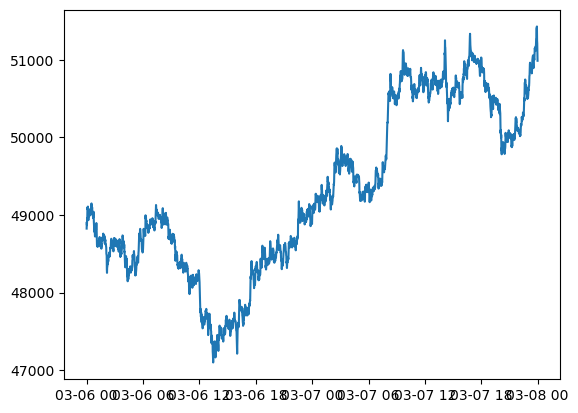

In [48]:
plt.plot(tweet_begin['Timestamp'], tweet_begin['Weighted_Price'])
plt.show()

In [49]:
most_liked_tweet = df[(df['Timestamp'].dt.date >= pd.to_datetime('2021-03-21').date()) & (df['Timestamp'].dt.date <= pd.to_datetime('2021-03-27').date())]

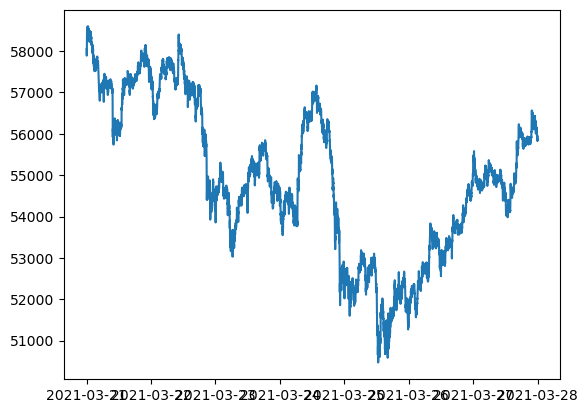

In [50]:
plt.plot(most_liked_tweet['Timestamp'], most_liked_tweet['Weighted_Price'])
plt.show()

In [51]:
second_most_liked_tweet = df[(df['Timestamp'].dt.date >= pd.to_datetime('2021-02-05').date()) & (df['Timestamp'].dt.date <= pd.to_datetime('2021-02-11').date())]

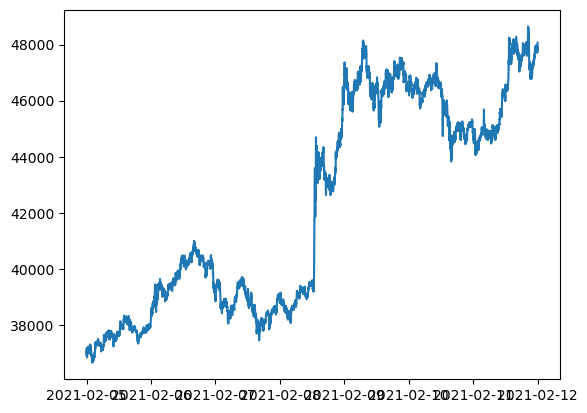

In [52]:
plt.plot(second_most_liked_tweet['Timestamp'], second_most_liked_tweet['Weighted_Price'])
plt.show()

In [53]:
third_most_liked_tweet = df[(df['Timestamp'].dt.date >= pd.to_datetime('2021-02-01').date()) & (df['Timestamp'].dt.date <= pd.to_datetime('2021-02-07').date())]

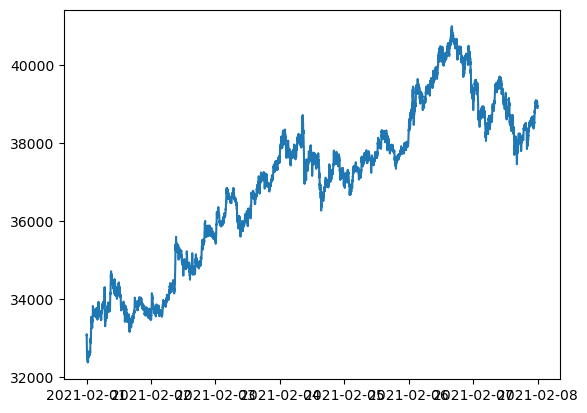

In [54]:
plt.plot(third_most_liked_tweet['Timestamp'], third_most_liked_tweet['Weighted_Price'])
plt.show()

In [55]:
fourth_most_liked_tweet = df[(df['Timestamp'].dt.date >= pd.to_datetime('2019-01-01').date()) & (df['Timestamp'].dt.date <= pd.to_datetime('2019-01-07').date())]

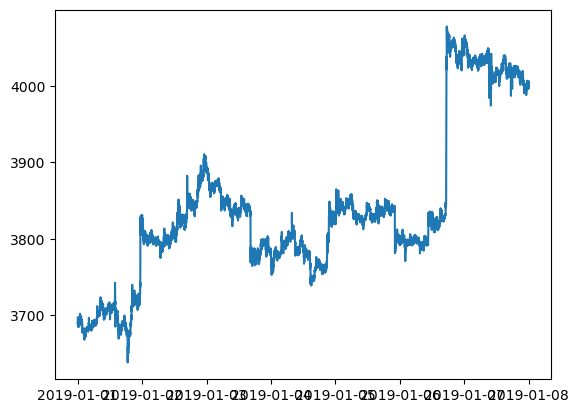

In [56]:
plt.plot(fourth_most_liked_tweet['Timestamp'], fourth_most_liked_tweet['Weighted_Price'])
plt.show()

In [57]:
fifth_most_liked_tweet = df[(df['Timestamp'].dt.date >= pd.to_datetime('2021-02-01').date()) & (df['Timestamp'].dt.date <= pd.to_datetime('2021-02-07').date())]

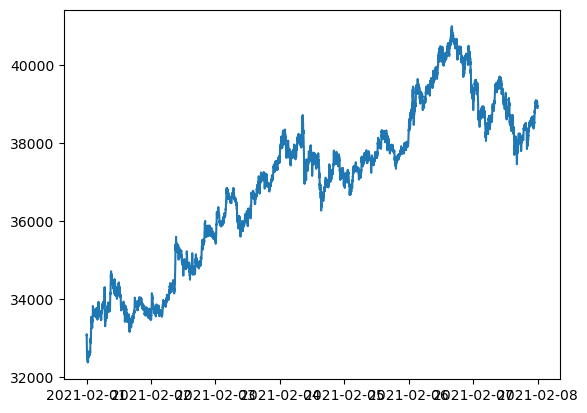

In [58]:
plt.plot(fifth_most_liked_tweet['Timestamp'], fifth_most_liked_tweet['Weighted_Price'])
plt.show()

In [59]:
sixth_most_liked_tweet = df[(df['Timestamp'].dt.date >= pd.to_datetime('2021-02-07').date()) & (df['Timestamp'].dt.date <= pd.to_datetime('2021-02-13').date())]

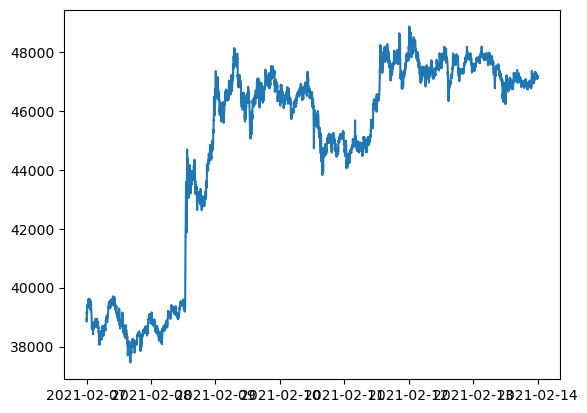

In [60]:
plt.plot(sixth_most_liked_tweet['Timestamp'], sixth_most_liked_tweet['Weighted_Price'])
plt.show()

In [61]:
# the seventh most liked tweet also falls out of the range of the dataset, dataset ends at 03/31/2021 12am
seventh_most_liked_tweet = df[(df['Timestamp'].dt.date >= pd.to_datetime('2021-03-29').date()) & (df['Timestamp'].dt.date <= pd.to_datetime('2021-04-04').date())]

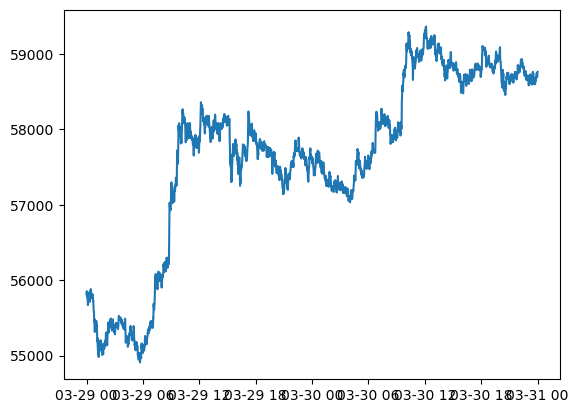

In [62]:
#irrelevent cannot see tweet on graph
plt.plot(seventh_most_liked_tweet['Timestamp'], seventh_most_liked_tweet['Weighted_Price'])
plt.show()

In [63]:
eighth_most_liked_tweet = df[(df['Timestamp'].dt.date >= pd.to_datetime('2020-11-10').date()) & (df['Timestamp'].dt.date <= pd.to_datetime('2020-11-16').date())]

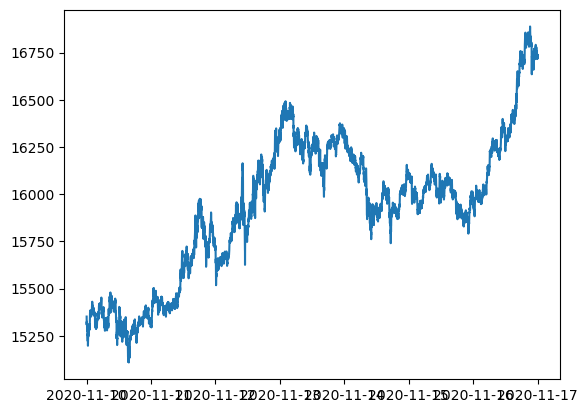

In [64]:
plt.plot(eighth_most_liked_tweet['Timestamp'], eighth_most_liked_tweet['Weighted_Price'])
plt.show()

In [65]:
ninth_most_liked_tweet = df[(df['Timestamp'].dt.date >= pd.to_datetime('2021-03-03').date()) & (df['Timestamp'].dt.date <= pd.to_datetime('2021-03-09').date())]

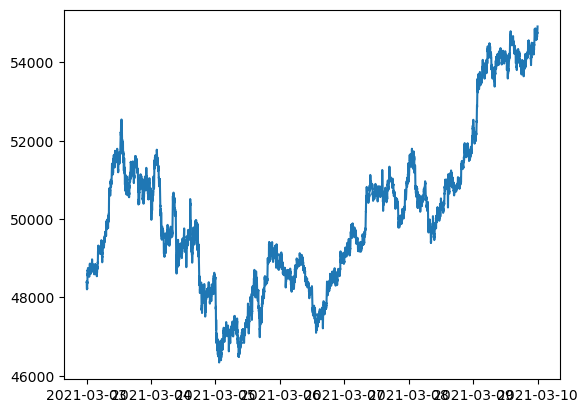

In [66]:
plt.plot(ninth_most_liked_tweet['Timestamp'], ninth_most_liked_tweet['Weighted_Price'])
plt.show()

In [67]:
tenth_most_liked_tweet = df[(df['Timestamp'].dt.date >= pd.to_datetime('2018-01-29').date()) & (df['Timestamp'].dt.date <= pd.to_datetime('2018-02-06').date())]

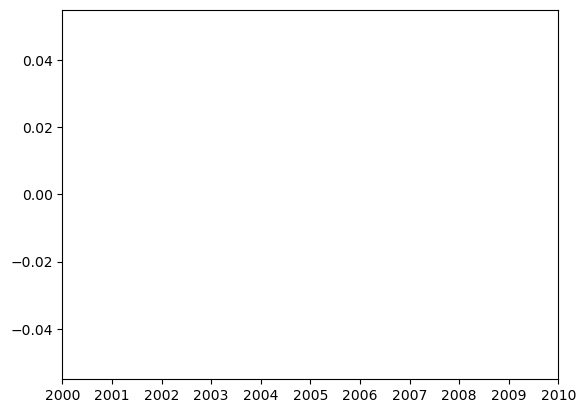

In [68]:
#Did not work because it is out of date range of dataset
plt.plot(tenth_most_liked_tweet['Timestamp'], tenth_most_liked_tweet['Weighted_Price'])
plt.show()

In [69]:
bitcoin = pd.read_csv('C:/Users/Lachlan/Desktop/bitcoin_price.csv')

In [70]:
first_tweet = bitcoin.iloc[4847296]
first_tweet

Timestamp            1.616544e+09
Open                 5.436007e+04
High                 5.436157e+04
Low                  5.421857e+04
Close                5.423385e+04
Volume_(BTC)         8.171792e+00
Volume_(Currency)    4.433997e+05
Weighted_Price       5.425978e+04
Name: 4847296, dtype: float64

In [71]:
ten_min_after = bitcoin.iloc[4847296+10]
ten_min_after

Timestamp            1.616545e+09
Open                 5.432761e+04
High                 5.438252e+04
Low                  5.430987e+04
Close                5.438090e+04
Volume_(BTC)         2.374880e+00
Volume_(Currency)    1.290362e+05
Weighted_Price       5.433377e+04
Name: 4847306, dtype: float64